In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [204]:
#set up to show all the rows in the dataframe
pd.set_option('display.max_rows', 15)

In [ ]:
df = pd.read_csv("C:\\Users\\germa\\OneDrive\\Documents\\Datasets\\crowdflower-ecommerce-search-relevance\\data\\kaggle_ecommerce_complete_rank_crowd_agg_descriptions_all_rows.csv")

In [205]:
#check for null values
df.isnull().sum()

unit_id                    0
relevance              12100
relevance_variance     12100
product_image              0
product_link               3
product_price              0
product_title              0
query                      0
rank                       0
source                     0
url                        0
product_description     7871
dtype: int64

In [206]:
#remove null values
df1 = df.dropna()

In [207]:
df1.isnull().sum()  

unit_id                0
relevance              0
relevance_variance     0
product_image          0
product_link           0
product_price          0
product_title          0
query                  0
rank                   0
source                 0
url                    0
product_description    0
dtype: int64

In [208]:
#data types of columns
df1.dtypes

unit_id                  int64
relevance              float64
relevance_variance     float64
product_image           object
product_link            object
product_price           object
product_title           object
query                   object
rank                     int64
source                  object
url                     object
product_description     object
dtype: object

In [209]:
df1.head()


,unit_id,relevance,relevance_variance,product_image,product_link,product_price,product_title,query,rank,source,url,product_description
0,711158459,3.67,0.471,http://thumbs2.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$329.98,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,1,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...
1,711158460,4.00,0.000,http://thumbs3.ebaystatic.com/d/l225/m/mJNDmSy...,http://www.ebay.com/itm/Sony-PlayStation-4-Lat...,$324.84,Sony PlayStation 4 (Latest Model)- 500 GB Jet ...,playstation 4,2,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...
2,711158461,4.00,0.000,http://thumbs4.ebaystatic.com/d/l225/m/m10NZXA...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$324.83,Sony PlayStation 4 PS4 500 GB Jet Black Console,playstation 4,3,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...
4,711158463,3.33,0.471,http://thumbs3.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$308.00\nTrending at\n$319.99,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,5,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...
5,711158464,3.20,0.748,http://thumbs4.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$310.00,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,6,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...


In [218]:
# regex pattern for 1,000.00
pat1 = "(\d+,\d{3}\.\d{2})"
# regex pattern for 999.99
pat2 = "(\d{3}\.\d{2})"
# regex pattern for 99.99
pat3 = "(\d{2}\.\d{2})"
# regex pattern for 9.99
pat4 = "(\d\.\d{2})"
# regex pattern for .99
pat5 = "(\d{1}\.\d{2})"

In [219]:
# function to extract different patterns from a string
def extract_pattern(string, pattern):
    # find all the matches
    matches = re.findall(pattern, string)
    # remove the commas in matches
    matches = [match.replace(",", "") for match in matches]

    # calculate the average of matches
    if len(matches) > 0:
        return round(sum(map(float, matches)) / len(matches),2)

    # if no matches, return 0
    return 0 

In [220]:
#how to apply a function to a column and create a new column
df1['product_price_clean'] = df1.loc[:,'product_price'].apply(lambda x: extract_pattern(x, pat1) or extract_pattern(x, pat2) or extract_pattern(x, pat3) or extract_pattern(x, pat4) or extract_pattern(x, pat5))


C:\Users\germa\AppData\Local\Temp\ipykernel_11008\3077207163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_price_clean'] = df1.loc[:,'product_price'].apply(lambda x: extract_pattern(x, pat1) or extract_pattern(x, pat2) or extract_pattern(x, pat3) or extract_pattern(x, pat4) or extract_pattern(x, pat5))


In [221]:
#show categorical columns
df1.select_dtypes(include=['object']).columns



Index(['product_image', 'product_link', 'product_price', 'product_title',
       'query', 'source', 'url', 'product_description'],
      dtype='object')

In [222]:
#convert categorical variables to numeric
df1['query_label'] = LabelEncoder().fit_transform(df1['query']) #query_label

C:\Users\germa\AppData\Local\Temp\ipykernel_11008\531277714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['query_label'] = LabelEncoder().fit_transform(df1['query']) #query_label


In [223]:
#convert source to numeric
df1['source_label'] = LabelEncoder().fit_transform(df1['source']) #source_label

C:\Users\germa\AppData\Local\Temp\ipykernel_11008\2861798721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['source_label'] = LabelEncoder().fit_transform(df1['source']) #source_label


In [224]:
df1[['query','query_label', 'source','source_label']]

,query,query_label,source,source_label
0,playstation 4,173,eBay,3
1,playstation 4,173,eBay,3
2,playstation 4,173,eBay,3
4,playstation 4,173,eBay,3
5,playstation 4,173,eBay,3
...,...,...,...,...
20566,kitchenaid mixer,131,walmart,4
20567,kitchenaid mixer,131,walmart,4
20568,kitchenaid mixer,131,walmart,4
20569,kitchenaid mixer,131,walmart,4


In [225]:
#calculate the z-scores of the quantitative variables
df1['product_price_zscore'] = stats.zscore(df1['product_price_clean'])
df1[['product_price_zscore', 'product_price_clean']]	#check the z-scores

C:\Users\germa\AppData\Local\Temp\ipykernel_11008\1816759424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_price_zscore'] = stats.zscore(df1['product_price_clean'])


,product_price_zscore,product_price_clean
0,0.789041,329.98
1,0.771588,324.84
2,0.771554,324.83
4,0.734781,314.00
5,0.721199,310.00
...,...,...
20566,-0.259618,21.14
20567,-0.248888,24.30
20568,-0.249941,23.99
20569,-0.297715,9.92


C:\Users\germa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_price_zscore', ylabel='Density'>

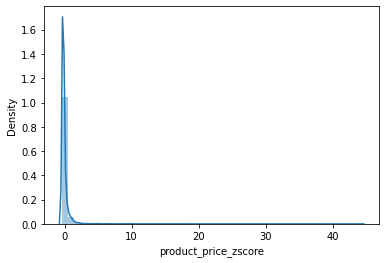

In [226]:
#visualize the z-scores of the quantitative variables
sns.distplot(df1['product_price_zscore'])

In [227]:
#remove outliers and create a new dataframe
df2 = df1[df1['product_price_zscore'] < 3]

C:\Users\germa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product_price_clean', ylabel='Density'>

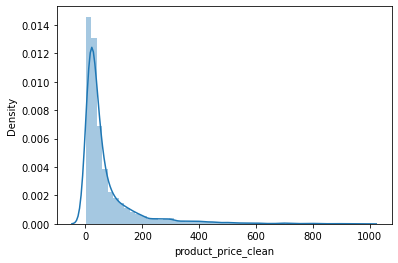

In [228]:
#visualize product price distribution
sns.distplot(df2['product_price_clean'])

In [229]:
df2.dtypes

unit_id                   int64
relevance               float64
relevance_variance      float64
product_image            object
product_link             object
                         ...   
product_description      object
query_label               int32
source_label              int32
product_price_clean     float64
product_price_zscore    float64
Length: 16, dtype: object

In [230]:
#show numerical columns
df2.select_dtypes(include=['number']).columns

Index(['unit_id', 'relevance', 'relevance_variance', 'rank', 'query_label',
       'source_label', 'product_price_clean', 'product_price_zscore'],
      dtype='object')

In [231]:
#show correlation between numerical variables
df2.corr()

,unit_id,relevance,relevance_variance,rank,query_label,source_label,product_price_clean,product_price_zscore
unit_id,1.000000,-0.085702,0.027389,-0.158261,0.021272,0.882311,-0.122380,-0.122380
relevance,-0.085702,1.000000,-0.397721,-0.037151,0.061019,-0.053586,0.088872,0.088872
relevance_variance,0.027389,-0.397721,1.000000,0.019267,-0.038544,0.003666,-0.044458,-0.044458
rank,-0.158261,-0.037151,0.019267,1.000000,0.011062,-0.151358,0.017398,0.017398
query_label,0.021272,0.061019,-0.038544,0.011062,1.000000,-0.006561,0.006838,0.006838
source_label,0.882311,-0.053586,0.003666,-0.151358,-0.006561,1.000000,-0.137772,-0.137772
product_price_clean,-0.122380,0.088872,-0.044458,0.017398,0.006838,-0.137772,1.000000,1.000000
product_price_zscore,-0.122380,0.088872,-0.044458,0.017398,0.006838,-0.137772,1.000000,1.000000


<AxesSubplot:>

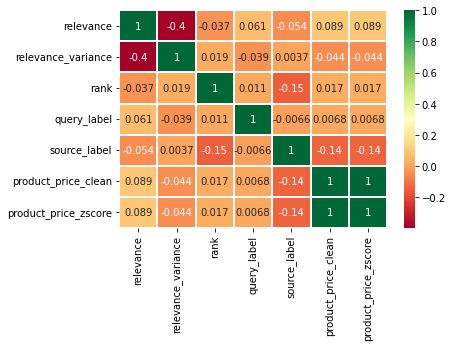

In [232]:
#plot the correlation between numerical variables removing the variable unit_id
sns.heatmap(df2.drop(['unit_id'], axis=1).corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


In [ ]:
#show correlations between numerical variables and the target variable
df2.corr()['product_price_clean'].sort_values(ascending=False)



In [233]:
df2.head()  #check the dataframe

,unit_id,relevance,relevance_variance,product_image,product_link,product_price,product_title,query,rank,source,url,product_description,query_label,source_label,product_price_clean,product_price_zscore
0,711158459,3.67,0.471,http://thumbs2.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$329.98,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,1,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...,173,3,329.98,0.789041
1,711158460,4.00,0.000,http://thumbs3.ebaystatic.com/d/l225/m/mJNDmSy...,http://www.ebay.com/itm/Sony-PlayStation-4-Lat...,$324.84,Sony PlayStation 4 (Latest Model)- 500 GB Jet ...,playstation 4,2,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...,173,3,324.84,0.771588
2,711158461,4.00,0.000,http://thumbs4.ebaystatic.com/d/l225/m/m10NZXA...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$324.83,Sony PlayStation 4 PS4 500 GB Jet Black Console,playstation 4,3,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...,173,3,324.83,0.771554
4,711158463,3.33,0.471,http://thumbs3.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$308.00\nTrending at\n$319.99,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,5,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...,173,3,314.00,0.734781
5,711158464,3.20,0.748,http://thumbs4.ebaystatic.com/d/l225/m/mzvzEUI...,http://www.ebay.com/itm/Sony-PlayStation-4-PS4...,$310.00,Sony PlayStation 4 (PS4) (Latest Model)- 500 G...,playstation 4,6,eBay,http://www.ebay.com/sch/i.html?_from=R40&_trks...,The PlayStation 4 system opens the door to an ...,173,3,310.00,0.721199


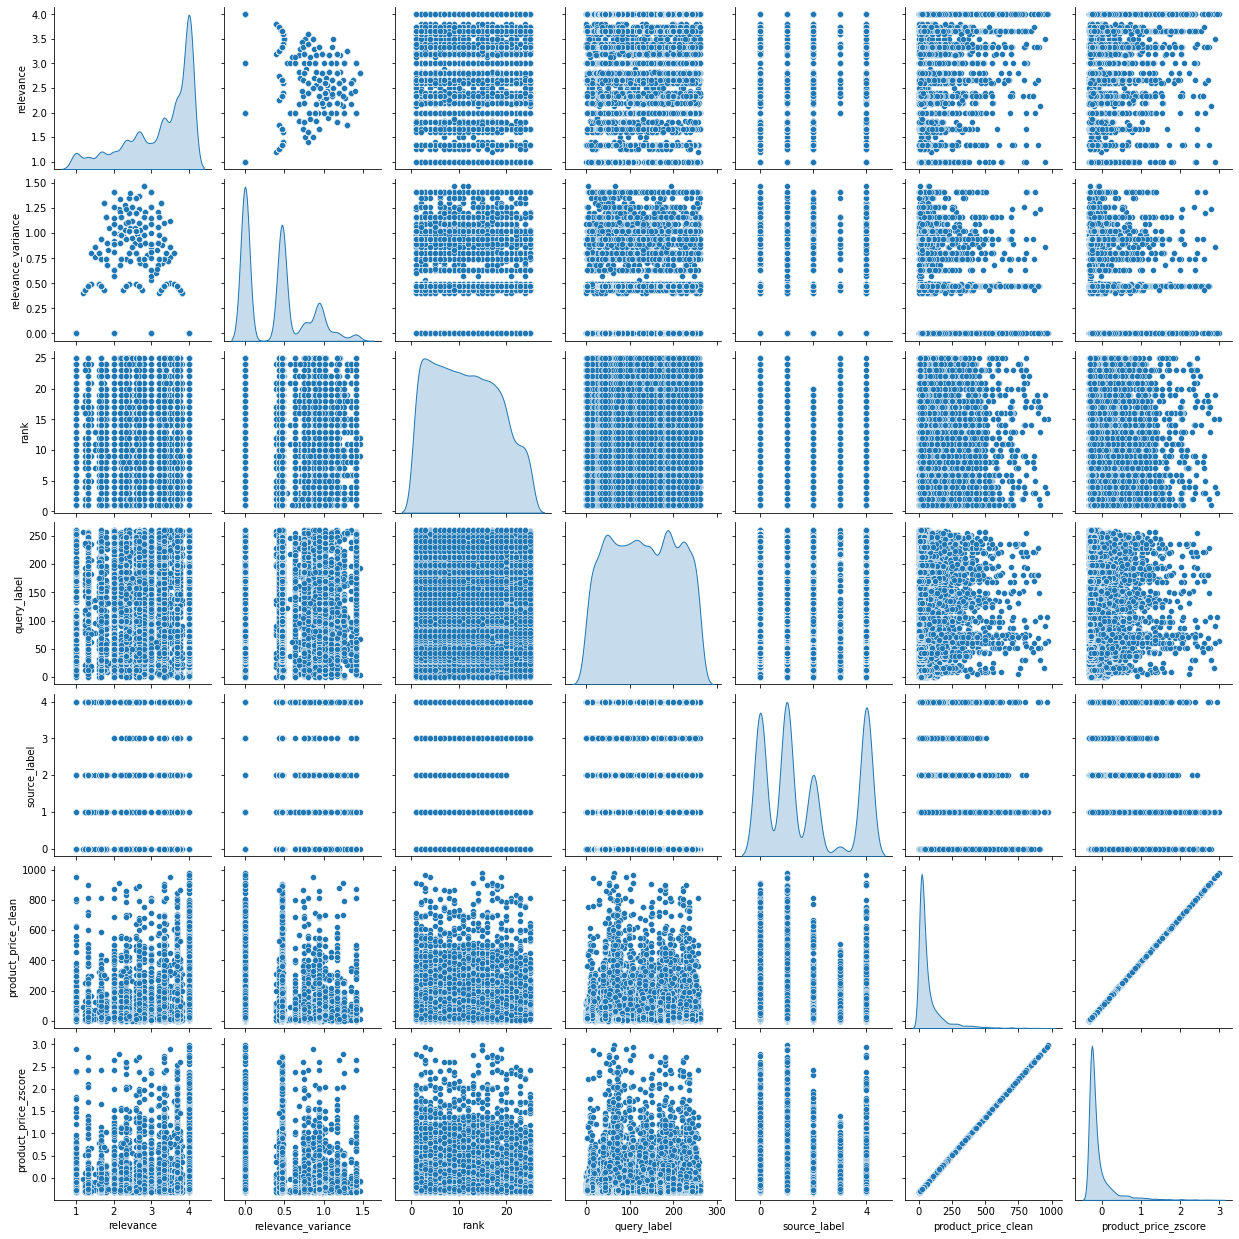

In [234]:
#pair scatter plots for all the numerical variables
sns.pairplot(df2.drop(['unit_id'], axis=1), diag_kind='kde')

In [235]:
#splitting data into train and test
from sklearn.model_selection import train_test_split

In [252]:
X = df2.drop(['product_price_clean','product_image','product_link','product_price','product_title','query','source','url','product_description','product_price_zscore'], axis=1)
y = df2['product_price_clean']


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [254]:
from sklearn.linear_model import LinearRegression

In [255]:
LR = LinearRegression(copy_X=True)
LR.fit(X_train, y_train)    

LinearRegression()

In [256]:
yhat = LR.predict(X_test)


In [257]:
from sklearn.metrics import mean_squared_error

In [258]:
mean_squared_error(y_test, yhat)


12922.855622730043

In [265]:
print("R squared error of LR model for training data %.3f"%LR.score(X_train, y_train))
print("R squared error of LR model for test data %.3f"%LR.score(X_test, y_test))



R squared error of LR model for training data 0.027
R squared error of LR model for test data 0.021


Only about 2% of the variation of the price is due to the independent variables. But I identified this issue before, because I couldn't find a strong correlation between the price and the other variables

In [270]:
#removing the variables with no much correlation, leaving only the 2 most correlated variables
X1 = df2.drop(['unit_id','relevance_variance','product_image','product_link','product_price','product_title','query','rank','source','url','product_description','product_price_clean','query_label','product_price_zscore'], axis=1)
y1 = df2['product_price_clean']


In [271]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle=True)
LR1 = LinearRegression(copy_X=True)
LR1.fit(X1_train, y1_train) 
y1hat = LR1.predict(X1_test)


In [272]:
mean_squared_error(y1_test, y1hat)

12900.55465113098

In [273]:
print("%.3f" % LR1.score(X1_train, y1_train))
print("%.3f" % LR1.score(X1_test, y1_test))

0.026
0.023


In the train set about 2.6% of the variations are explained by source_label and relevance, the 2 most correlated variables to price
In the test set, about 2.3% of the variations are explained by source_label and relevance.
This result is similar to the one obtained when using all the variables. This shows again that the source_label and relevance are the most impacting variables, but still not that much impacting. They explain very little of the variance. 

In this data set, price is not that impacted by the other variables

In [274]:
#show head only for the numeric variables in df2
df2.select_dtypes(include=['number'])

,unit_id,relevance,relevance_variance,rank,query_label,source_label,product_price_clean,product_price_zscore
0,711158459,3.67,0.471,1,173,3,329.98,0.789041
1,711158460,4.00,0.000,2,173,3,324.84,0.771588
2,711158461,4.00,0.000,3,173,3,324.83,0.771554
4,711158463,3.33,0.471,5,173,3,314.00,0.734781
5,711158464,3.20,0.748,6,173,3,310.00,0.721199
...,...,...,...,...,...,...,...,...
20566,711179068,3.33,0.943,15,131,4,21.14,-0.259618
20567,711179069,1.67,0.471,16,131,4,24.30,-0.248888
20568,711179070,1.33,0.471,17,131,4,23.99,-0.249941
20569,711179071,2.60,1.200,18,131,4,9.92,-0.297715


C:\Users\germa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


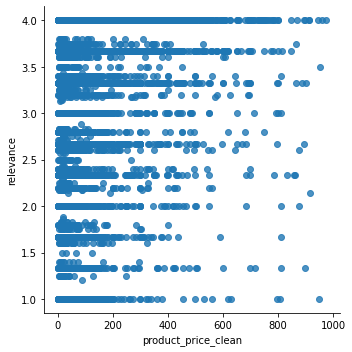

In [275]:
#scatterplot between product_price_clean and query_label



sns.lmplot('product_price_clean', 'relevance', data=df2, fit_reg=False)

In [276]:
#correlation between product_price_clean and query_label
df2.corr()['product_price_clean'].abs().sort_values(ascending=False)

product_price_zscore    1.000000
product_price_clean     1.000000
source_label            0.137772
unit_id                 0.122380
relevance               0.088872
relevance_variance      0.044458
rank                    0.017398
query_label             0.006838
Name: product_price_clean, dtype: float64

In [277]:
# decision tree regression analysis
from sklearn.tree import DecisionTreeRegressor

In [278]:
price_tree = DecisionTreeRegressor(max_depth=3, random_state=0)
price_tree.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [279]:
pred_tree = price_tree.predict(X1_test)

In [280]:
from sklearn import metrics

In [281]:
# show y1_test and pred_tree
print("Mean squared error: %.3f" % metrics.mean_squared_error(y1_test, pred_tree))

Mean squared error: 12810.157


In [282]:
# show accuracy of the model
print("Accuracy: %.3f" % metrics.r2_score(y1_test, pred_tree))

Accuracy: 0.029


All in all, this is a bad dataset since it was not possible to get very accurate models. The target variable price was not very well explained by the independent variables.